# Milestone 1 Part 2

#### `1- Import Important Libraries`

In [41]:
import numpy as np; np.random.seed(42)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile # feature Selection
from sklearn.feature_selection import chi2, f_classif # feature Selection
from sklearn.feature_selection import SelectFromModel # feature Selection
from sklearn.impute import SimpleImputer # replace Nan with mean
from sklearn.linear_model import LinearRegression
# measuring RMSE score
from sklearn.metrics import mean_squared_error
import pickle
import time
from sklearn.metrics import r2_score

#### `2- Explore Data`

In [2]:
# read file and ignore first column 
df = pd.read_csv('player-value-prediction-cleaned.csv').iloc[:, 1:] 
# df.head(5)

In [3]:
# data cleaned no nan values
# df.info()

In [4]:
# df.columns

In [5]:
# df.isna().sum()

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
# save the model to disk
filename = 'imp_mean.sav'
pickle.dump(imp_mean, open(filename, 'wb')) 
data = imp_mean.transform(df)
# print(df)

In [7]:
print(np.any(np.isnan(data))) # check nan
print(np.all(np.isfinite(data))) # check infinity

False
True


In [8]:
# Once we have the DataFrame, we can use the replace method to replace the infinity values with NaN values. 
# Then, we will call the fillna() method to replace all NaN values in the DataFrame.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [9]:
# df.shape

In [10]:
# df.duplicated().sum()

In [11]:
# divide data to input & output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Your y is of type object, so sklearn cannot recognize its type. 
# Add the line y=y.astype('int') right after the line y = train[:, 1].
y=y.astype('int')

In [12]:
X_No_Feature_Selected = X

In [13]:
X.shape

(14136, 78)

In [14]:
y.shape

(14136,)

In [15]:
y = y.to_numpy().reshape(len(y), 1)
y.shape

(14136, 1)

#### `3- Feature Selection`

In [16]:
# Just Method for selection with % 
# Feature_Selection = SelectPercentile(score_func = chi2, percentile = 20)
# X = Feature_Selection.fit_transform(X, y)
# X.shape

In [17]:
# This Method You determine the model you want to select according for it and it return best no feature of it
Linear_Reg = LinearRegression()
Feature_Selection = SelectFromModel(estimator= Linear_Reg)
X = Feature_Selection.fit_transform(X, y)

# save the model to disk
filename = 'Feature_Selection.sav'
pickle.dump(Feature_Selection, open(filename, 'wb')) 
X.shape

(14136, 26)

In [18]:
len(Feature_Selection.get_feature_names_out())

26

In [19]:
col_name = Feature_Selection.get_feature_names_out()
# col_name

In [20]:
X = np.array(X)
X = pd.DataFrame(X, columns=col_name)
# X

#### `4- Split Data To Test & Train`

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [22]:
# without Feature Selection
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_No_Feature_Selected,y,test_size=0.2,random_state=27)

In [23]:
X_train.shape

(11308, 26)

In [24]:
X_test.shape

(2828, 26)

In [25]:
y_train.shape

(11308, 1)

In [26]:
y_test.shape

(2828, 1)

#### `5- Feature Scaling`

###### `Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.`

In [27]:
# Standariztion
# Scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# X = Scaler.fit_transform(X)
# X
scale = StandardScaler().fit(X_train)
# save the model to disk
filename = 'scale.sav'
pickle.dump(scale, open(filename, 'wb')) 
# transform the training data column
X_train_stand = scale.transform(X_train)

# transform the testing data column
X_test_stand = scale.transform(X_test)

In [28]:
# X = np.array(X)
# X = pd.DataFrame(X, columns=col_name)
# X

In [29]:
# Normalization
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# save the model to disk
filename = 'norm.sav'
pickle.dump(norm, open(filename, 'wb')) 
# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [30]:
# polynomial 
# fit poly on training data
poly = PolynomialFeatures(degree=2).fit(X_train)  

# save the model to disk
filename = 'poly.sav'
pickle.dump(poly, open(filename, 'wb')) 
# transform training data
X_train_poly = poly.transform(X_train)

# transform testing dataabs
X_test_poly = poly.transform(X_test)

In [31]:
# Without Feature Scaling
# Standariztion
# Scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# X = Scaler.fit_transform(X)
# X
scale_NOSelect = StandardScaler().fit(Xs_train)

# save the model to disk
filename = 'scale_NOSelect.sav'
pickle.dump(scale_NOSelect, open(filename, 'wb')) 
# transform the training data column
Xs_train_stand = scale_NOSelect.transform(Xs_train)

# transform the testing data column
Xs_test_stand = scale_NOSelect.transform(Xs_test)

#### `6- Visualize Data`

<AxesSubplot:xlabel='variable', ylabel='value'>

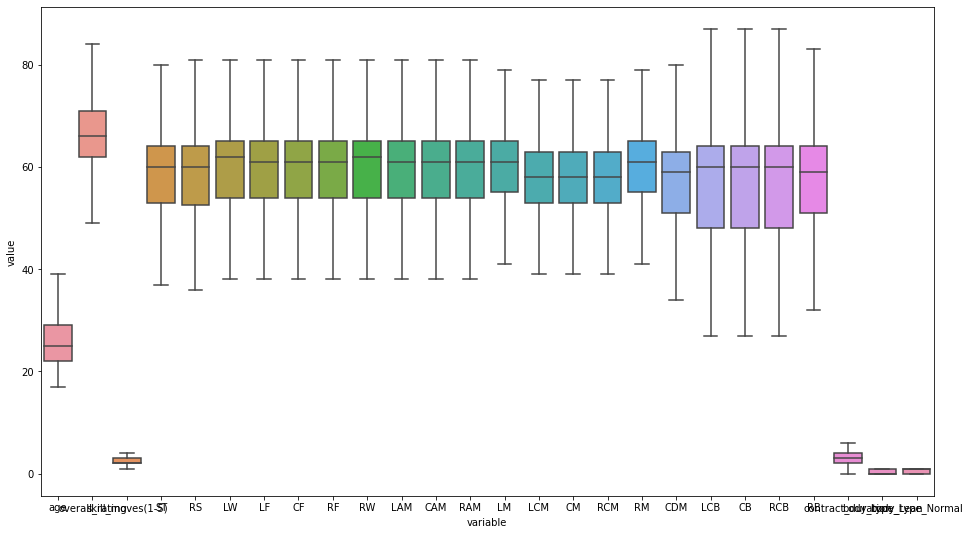

In [32]:
#  Original data
# Boxplot of Multiple Columns of a Pandas Dataframe on the Same Figure (seaborn)
# Plotting a figure of width 6 and height 3
fig = plt.figure(figsize=(16, 9))
X_V = pd.DataFrame(data = X_train.iloc[:,:len(col_name)], columns = col_name)

sns.boxplot(x="variable", y="value", data=pd.melt(X_V))

# plt.show()

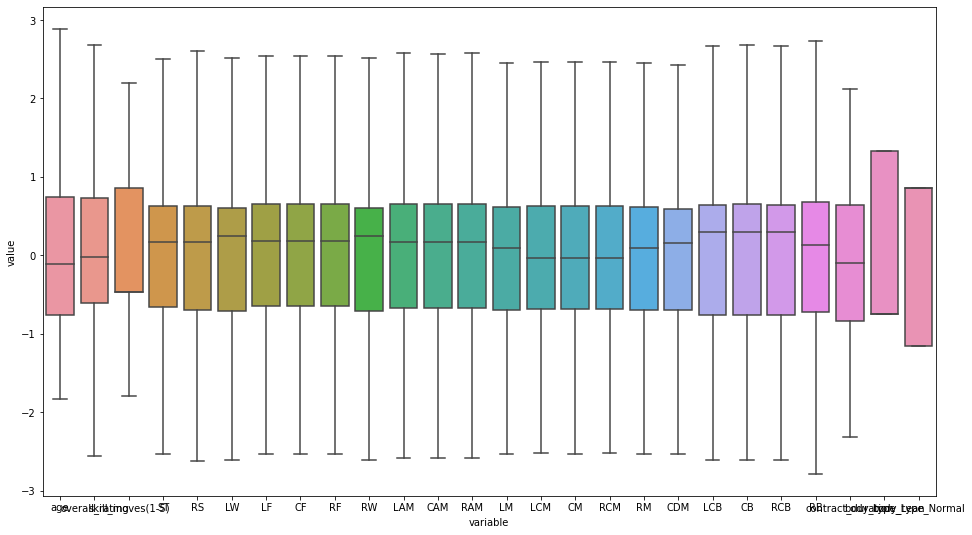

In [33]:
#  standard data
# Boxplot of Multiple Columns of a Pandas Dataframe on the Same Figure (seaborn)
# Plotting a figure of width 6 and height 3
fig = plt.figure(figsize=(16, 9))
X_V = pd.DataFrame(data = X_train_stand[:,:len(col_name)], columns = col_name)

sns.boxplot(x="variable", y="value", data=pd.melt(X_V))

plt.show()

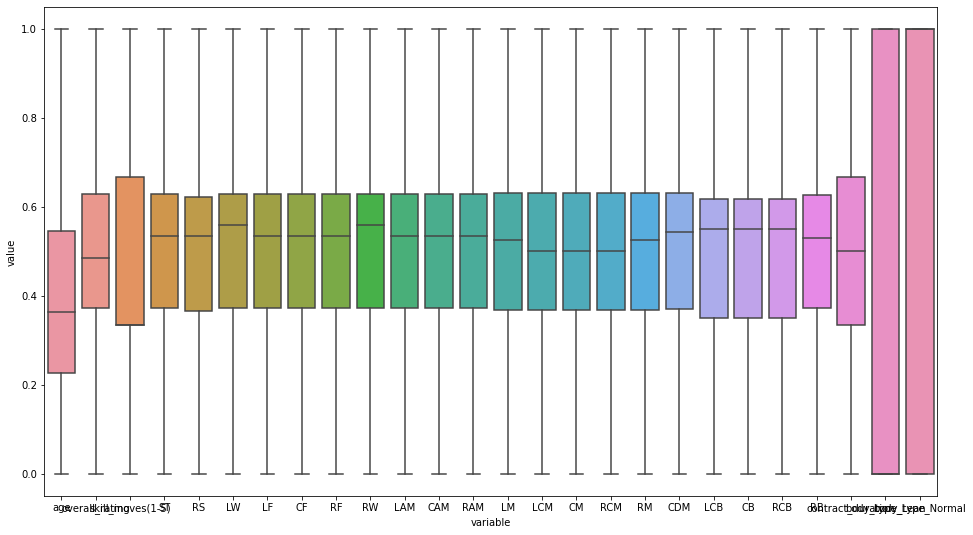

In [34]:
#  normalize data
# Boxplot of Multiple Columns of a Pandas Dataframe on the Same Figure (seaborn)
# Plotting a figure of width 6 and height 3
fig = plt.figure(figsize=(16, 9))
X_V = pd.DataFrame(data = X_train_norm[:,:len(col_name)], columns = col_name)

sns.boxplot(x="variable", y="value", data=pd.melt(X_V))

plt.show()

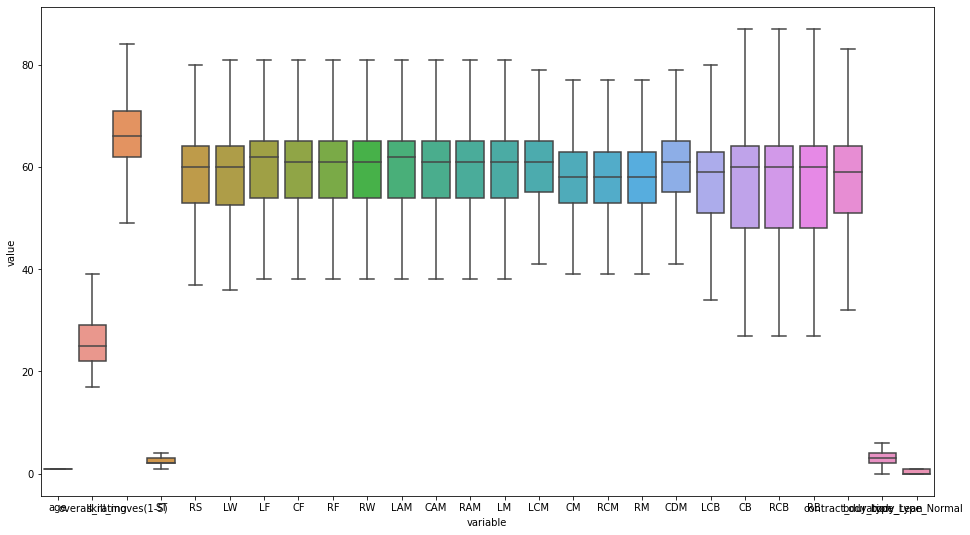

In [35]:
#  poly data
# Boxplot of Multiple Columns of a Pandas Dataframe on the Same Figure (seaborn)
# Plotting a figure of width 6 and height 3
fig = plt.figure(figsize=(16, 9))
X_V = pd.DataFrame(data = X_train_poly[:, :len(col_name)], columns = col_name)

sns.boxplot(x="variable", y="value", data=pd.melt(X_V))

plt.show()

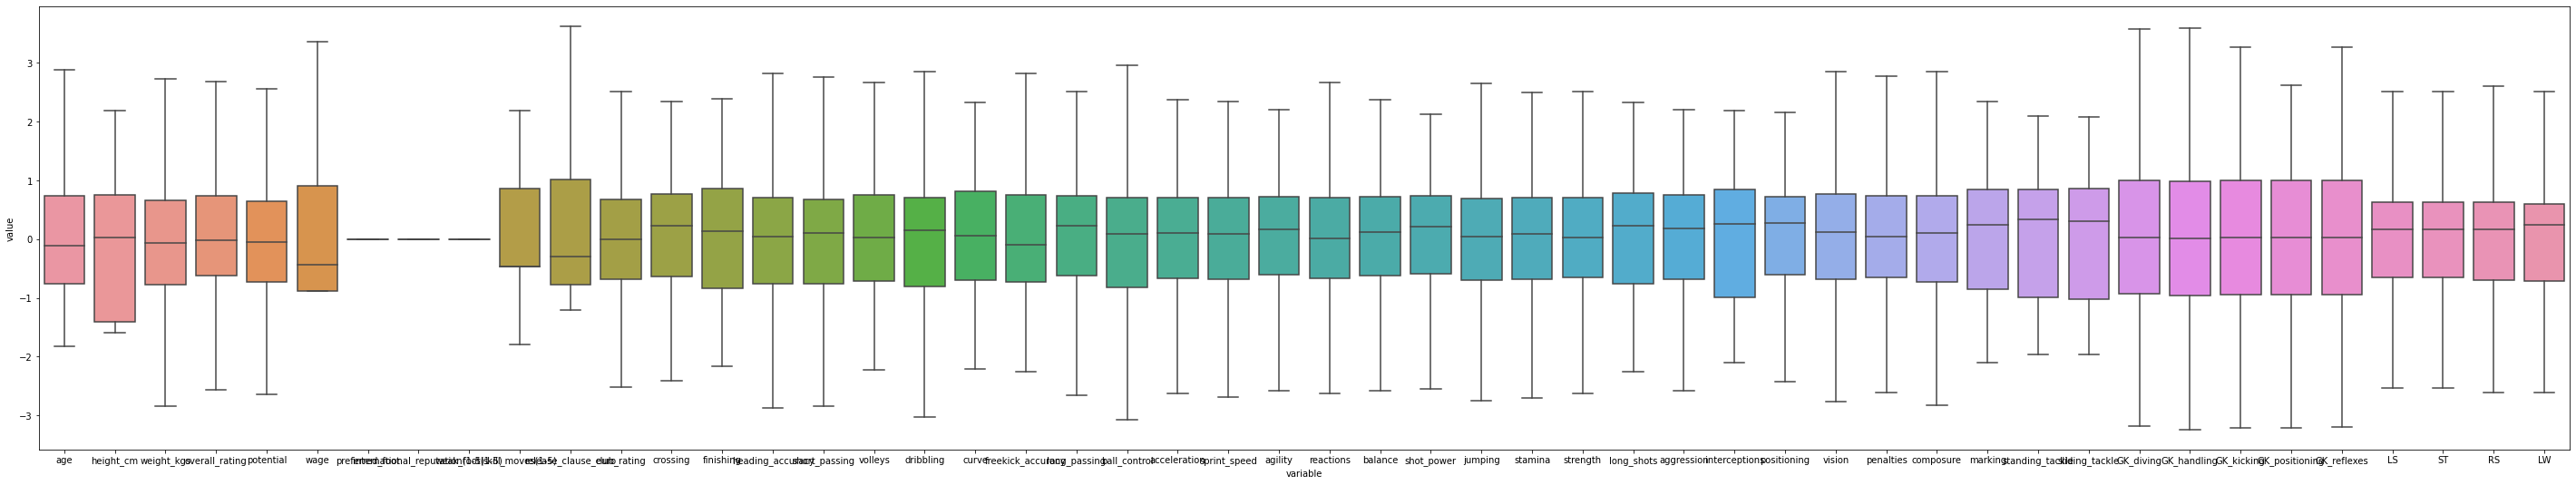

In [36]:
#  Without Feature Selection
# Boxplot of Multiple Columns of a Pandas Dataframe on the Same Figure (seaborn)
# Plotting a figure of width 6 and height 3
fig = plt.figure(figsize=(50, 9))
X_V = pd.DataFrame(data = Xs_train_stand[:, :50], columns = df.columns[:50])

sns.boxplot(x="variable", y="value", data=pd.melt(X_V))

plt.show()

#### `7- Applying Machine Learning Algorithm Linear Regression`

In [44]:
# training a Linear Regression model
Linear_Reg = LinearRegression()

mse = []

# raw, normalized, standardized and polynomial training and testing data
trainX = [X_train, X_train_norm, X_train_stand, X_train_poly, Xs_train_stand]
testX = [X_test, X_test_norm, X_test_stand, X_test_poly, Xs_test_stand]
# model fitting and measuring MSE
models = ['Multiple','Normalized','Standardized','Polynomial', 'No_Selection']
# model fitting and measuring RMSE
for i in range(len(trainX)):
    start = time.time() 
    # fit
    Linear_Reg.fit(trainX[i],y_train)
    stop = time.time()  
    
    # save the model to disk 
    pred = Linear_Reg.predict(testX[i])
    
    # save the model to disk
    filename = 'Linear_Reg_'+str(i)+'.sav' 
    pickle.dump(Linear_Reg, open(filename, 'wb')) 
    # RMSE
    mse.append(mean_squared_error(y_test,pred))
    print("Training Time of ",models[i],stop-start)
    print("Accuracy of " , models[i],r2_score(y_test, pred))
    

# visualizing the result
df_Linear_Reg = pd.DataFrame({'MSE':mse},index=['Multiple','Normalized','Standardized','Polynomial', 'No_Selection'])
print(df_Linear_Reg)

Training Time of  Multiple 0.13492131233215332
Accuracy of  Multiple 0.34241838781434064
Training Time of  Normalized 0.40075135231018066
Accuracy of  Normalized 0.34241838781434075
Training Time of  Standardized 0.30537915229797363
Accuracy of  Standardized 0.34241838781434075
Training Time of  Polynomial 2.5141239166259766
Accuracy of  Polynomial -11919744866301.096
Training Time of  No_Selection 0.17989468574523926
Accuracy of  No_Selection 0.42418414667901727
                       MSE
Multiple      2.052822e+13
Normalized    2.052822e+13
Standardized  2.052822e+13
Polynomial    3.721076e+26
No_Selection  1.797568e+13


# Ending of Milestone 1